In [127]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, make_scorer, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/MBAN%206750%20HW/Employee_Attrition_Data_Set(1).csv')

In [40]:
# Display basic information
print(df.shape)
print(df.columns)
print(df.info())
print(df.head())
print(df.tail())

(10000, 13)
Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000

In [55]:
# Check for any missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the missing values
missing_values

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

In [41]:
# Convert 'attrition' to 1 or 0
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)

In [42]:
df.head()

Employee ID  Age  Gender    Job Role Department  Monthly Income  \
0            1   50    Male          HR         IT           11547   
1            2   36    Male       Sales    Support            8643   
2            3   29    Male  Technician         HR           12418   
3            4   42    Male  Technician    Support           11441   
4            5   40  Female    Engineer      Sales            9178   

   Years at Company  Number of Promotions  Last Raise Percentage  \
0                12                     1              12.288783   
1                28                     4               3.496371   
2                12                     4               4.796945   
3                25                     1              10.310471   
4                25                     2               6.210127   

   Distance from Office  Job Satisfaction  Performance Rating  Attrition  
0             41.307654                 9                   1          0  
1             44.733204                 8                   1          1  
2             18.646876                 1                   3          0  
3             15.790848                 8                   4          0  
4             41.239179                 6                   4          0

In [43]:
df.describe()

Employee ID           Age  Monthly Income  Years at Company  \
count  10000.00000  10000.000000    10000.000000      10000.000000   
mean    5000.50000     40.561200     8948.750300         14.311100   
std     2886.89568     10.876483     3473.354793          8.742572   
min        1.00000     22.000000     3000.000000          0.000000   
25%     2500.75000     31.000000     5895.000000          7.000000   
50%     5000.50000     41.000000     8982.500000         14.000000   
75%     7500.25000     50.000000    11928.250000         22.000000   
max    10000.00000     59.000000    14999.000000         30.000000   

       Number of Promotions  Last Raise Percentage  Distance from Office  \
count          10000.000000           10000.000000          10000.000000   
mean               1.958300              10.022797             26.632481   
std                1.426171               5.823696             14.396393   
min                0.000000               0.000000              1.000000   
25%                1.000000               5.101189             14.509275   
50%                2.000000               9.990978             27.122930   
75%                3.000000              15.042273             39.148606   
max                5.000000              20.000000             50.000000   

       Job Satisfaction  Performance Rating     Attrition  
count      10000.000000        10000.000000  10000.000000  
mean           5.407000            2.992900      0.140300  
std            2.943504            1.410833      0.347315  
min            1.000000            1.000000      0.000000  
25%            3.000000            2.000000      0.000000  
50%            5.000000            3.000000      0.000000  
75%            8.000000            4.000000      0.000000  
max           10.000000            5.000000      1.000000

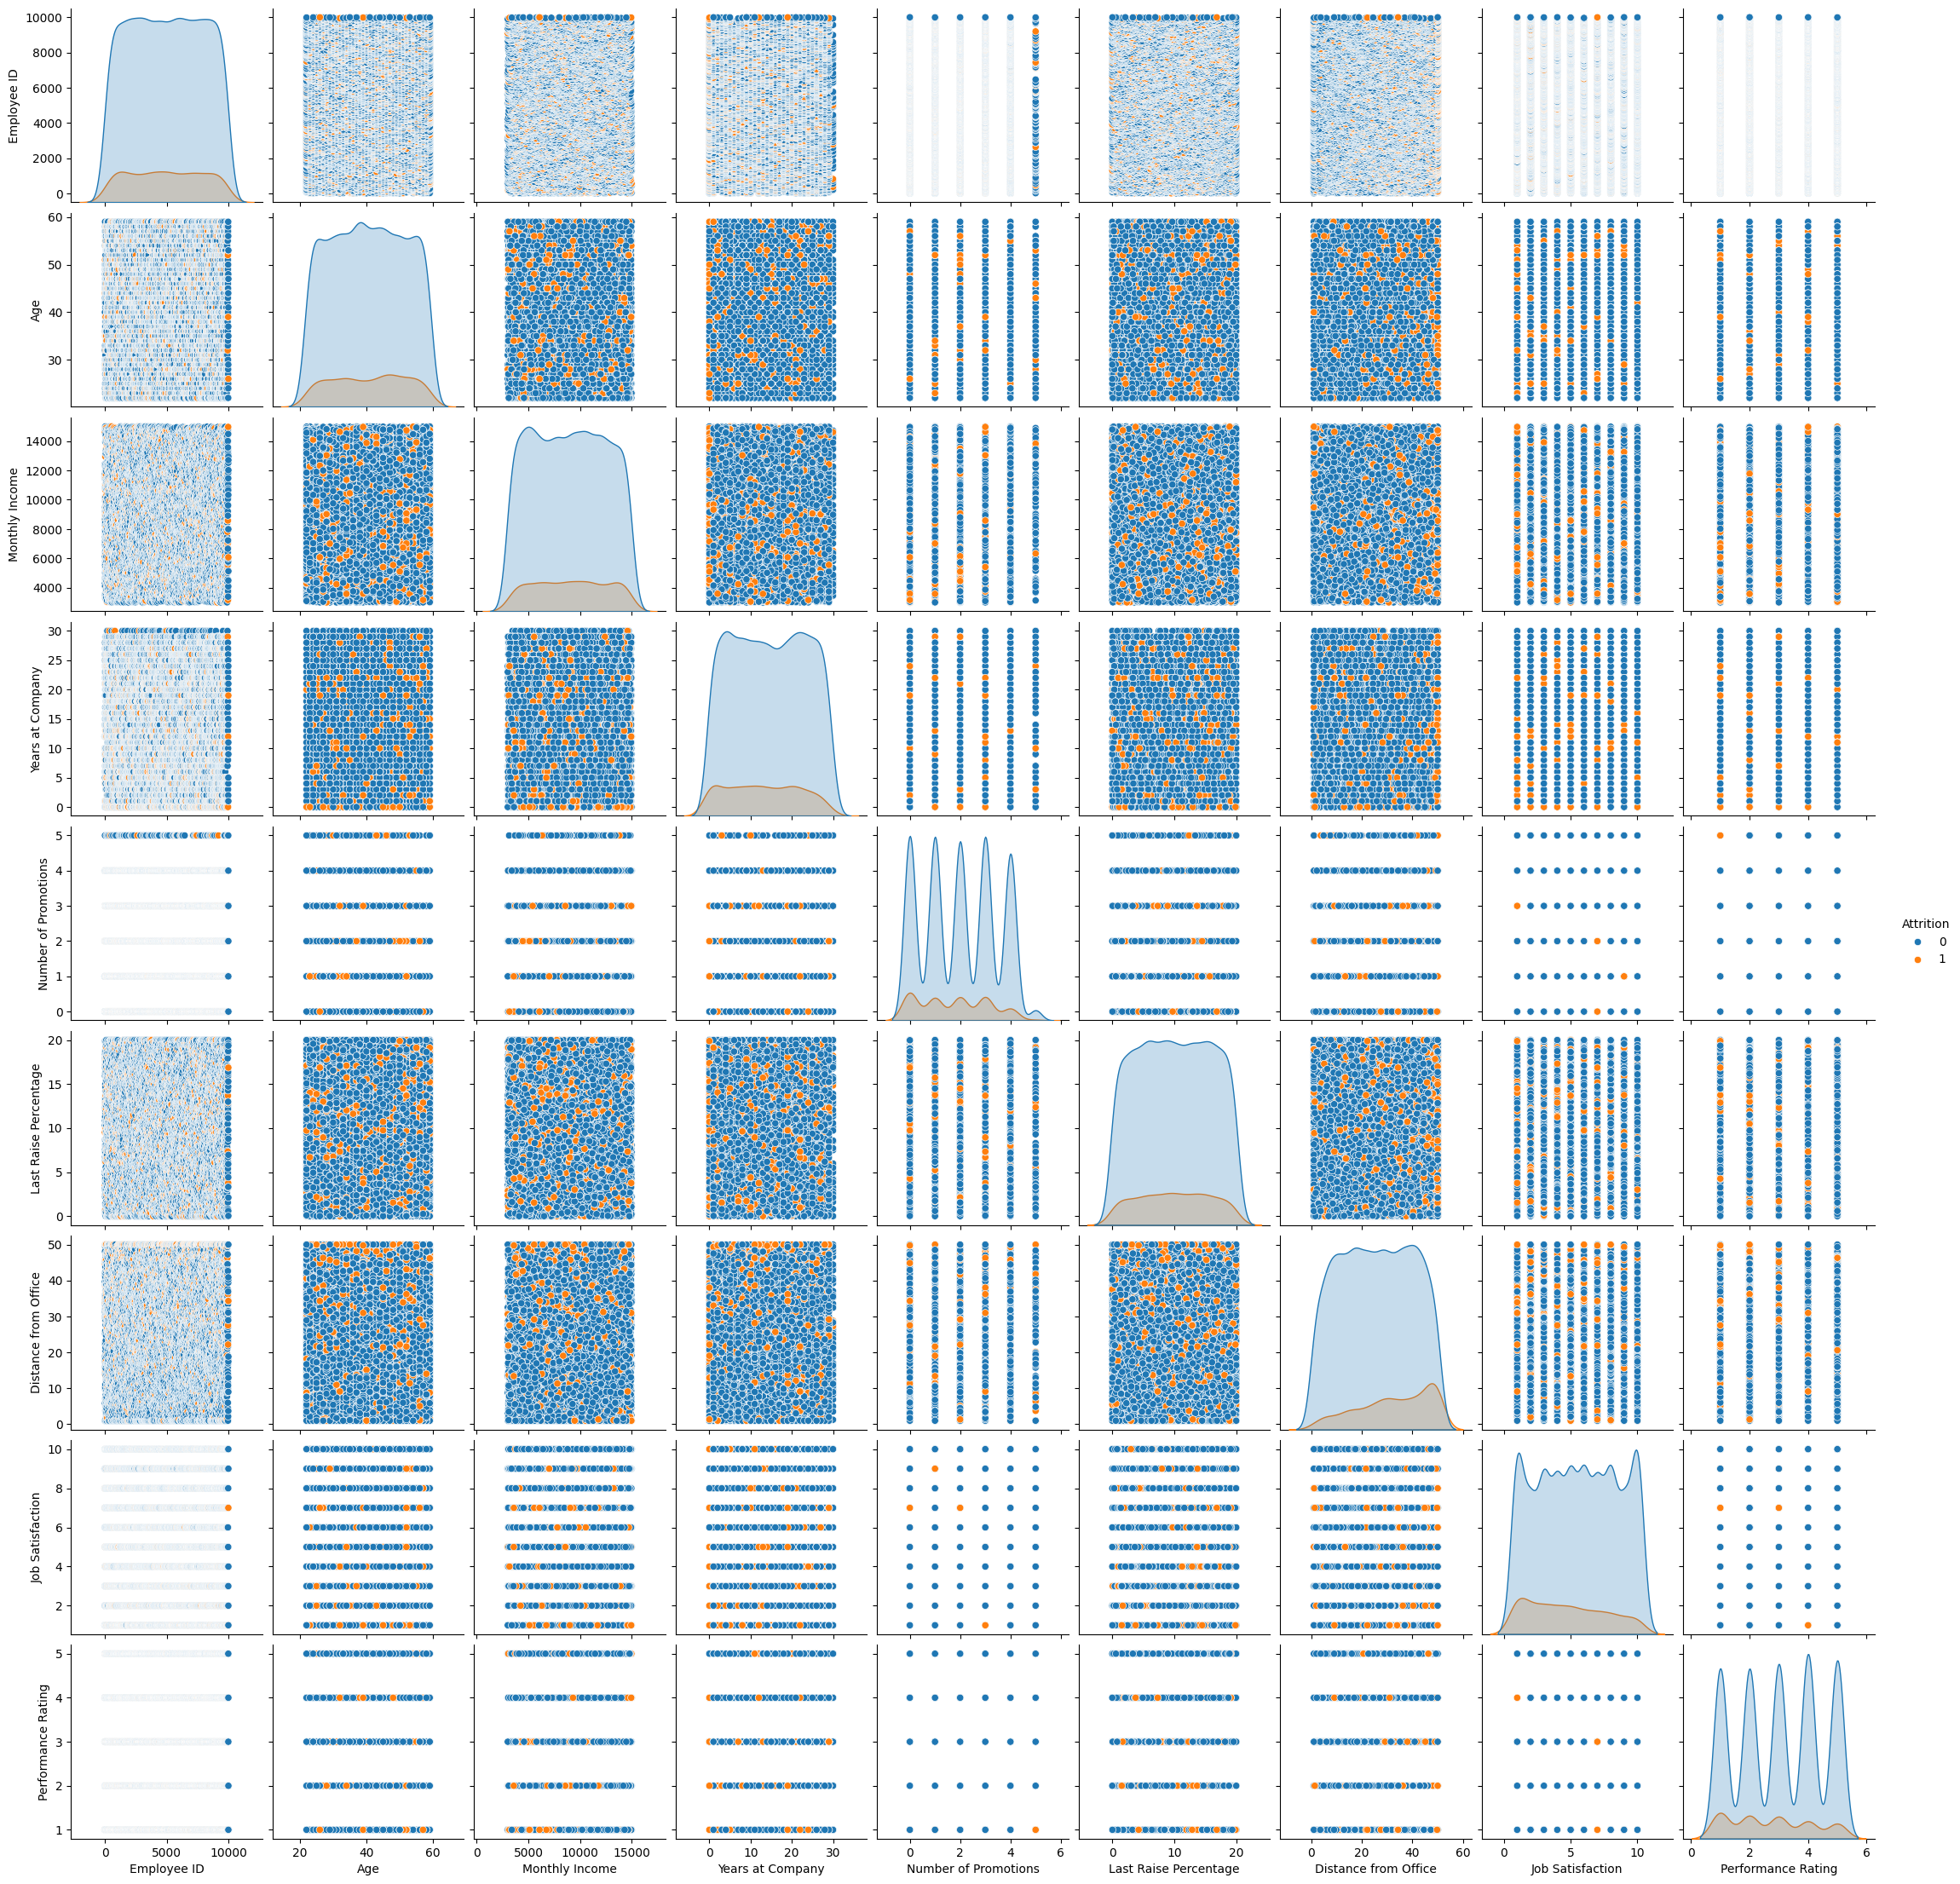

In [44]:
# pairplot
sns.pairplot(df, hue='Attrition')

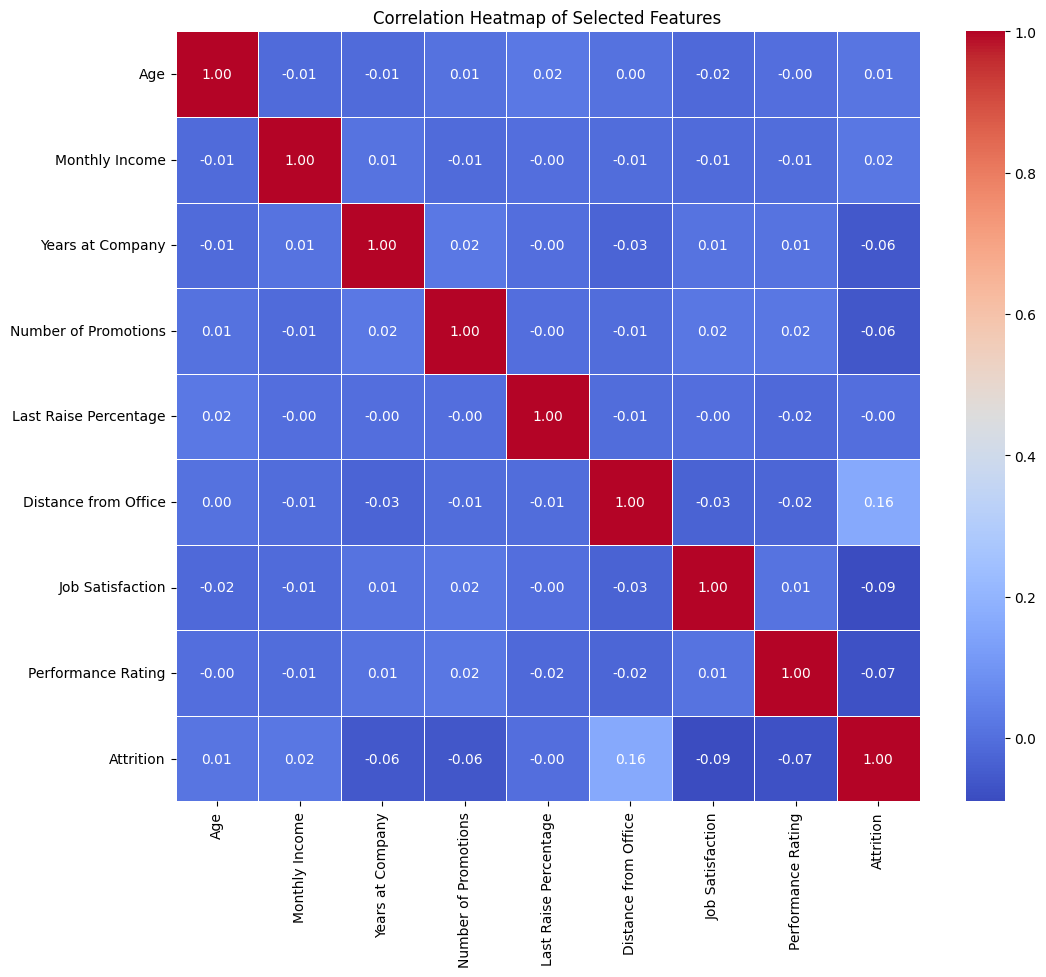

In [45]:
# heatmap
# Include only numeric features and the target variable
numeric_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition']

# Calculate the correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [46]:
# Define the numeric features and the target variable
numeric_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
                    'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
                    'Performance Rating']
target = 'Attrition'

# Ensure 'Attrition' is binary and convert to integer type
df[target] = df[target].astype(int)

# Perform t-tests for each numeric feature
t_test_results = {}
for feature in numeric_features:
    no_attrition = df[df[target] == 0][feature]
    yes_attrition = df[df[target] == 1][feature]
    t_stat, p_value = stats.ttest_ind(no_attrition, yes_attrition, equal_var=False)
    t_test_results[feature] = (t_stat, p_value)

# Display the results
t_test_results

{'Age': (-1.2701401346484282, 0.20419088513539313),
 'Monthly Income': (-1.766782493969072, 0.07742553541149293),
 'Years at Company': (5.779035193977856, 8.764613961216754e-09),
 'Number of Promotions': (6.550883205652668, 7.303282366636e-11),
 'Last Raise Percentage': (0.17875621452940071, 0.8581481191594507),
 'Distance from Office': (-16.72400312997231, 1.13271460215268e-58),
 'Job Satisfaction': (9.217059123901592, 7.775228418952353e-20),
 'Performance Rating': (7.518670837417109, 8.460946377762192e-14)}

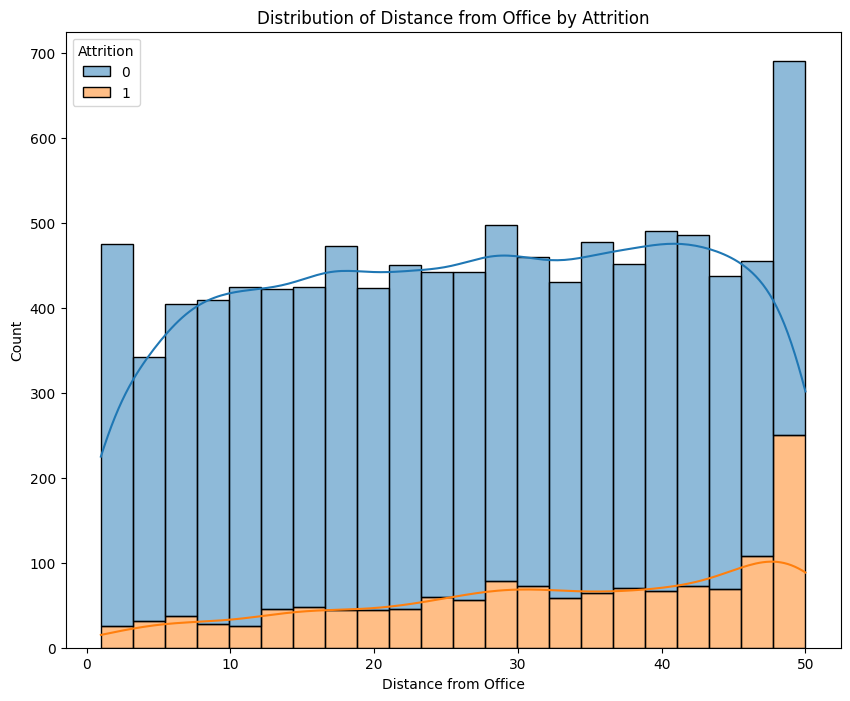

In [150]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Distance from Office', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Distance from Office by Attrition')
plt.show()

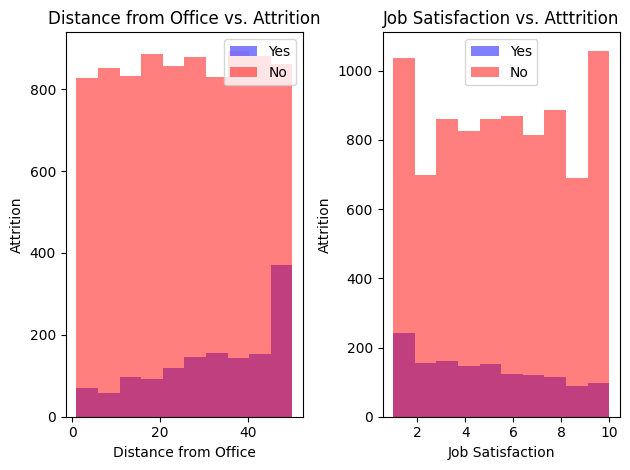

In [47]:
# Histogram for 'distance from office'
plt.subplot(1, 2, 1)
plt.hist(df[df['Attrition'] == 1]['Distance from Office'], bins=10, color='blue', alpha=0.5, label='Yes')
plt.hist(df[df['Attrition'] == 0]['Distance from Office'], bins=10, color='red', alpha=0.5, label='No')
plt.title('Distance from Office vs. Attrition')
plt.xlabel('Distance from Office')
plt.ylabel('Attrition')
plt.legend()

# Histogram for 'job satisfaction'
plt.subplot(1, 2, 2)
plt.hist(df[df['Attrition'] == 1]['Job Satisfaction'], bins=10, color='blue', alpha=0.5, label='Yes')
plt.hist(df[df['Attrition'] == 0]['Job Satisfaction'], bins=10, color='red', alpha=0.5, label='No')
plt.title('Job Satisfaction vs. Atttrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition')
plt.legend()

plt.tight_layout()
plt.show()


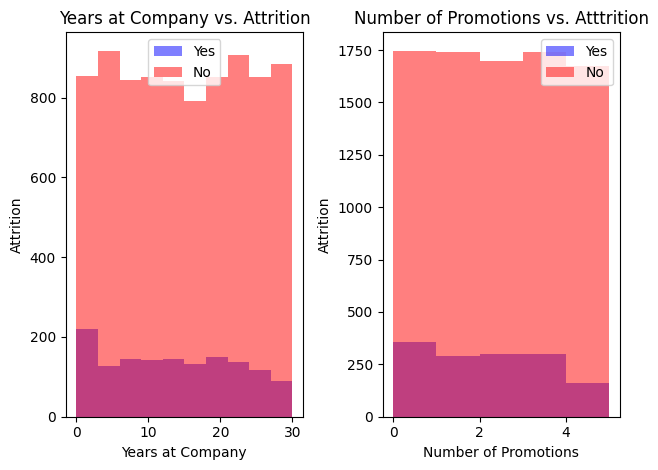

In [48]:
# Histogram for 'Years at Company'
plt.subplot(1, 2, 1)
plt.hist(df[df['Attrition'] == 1]['Years at Company'], bins=10, color='blue', alpha=0.5, label='Yes')
plt.hist(df[df['Attrition'] == 0]['Years at Company'], bins=10, color='red', alpha=0.5, label='No')
plt.title('Years at Company vs. Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Attrition')
plt.legend()

# Histogram for 'Number of Promotions'
plt.subplot(1, 2, 2)
plt.hist(df[df['Attrition'] == 1]['Number of Promotions'], bins=5, color='blue', alpha=0.5, label='Yes')
plt.hist(df[df['Attrition'] == 0]['Number of Promotions'], bins=5, color='red', alpha=0.5, label='No')
plt.title('Number of Promotions vs. Atttrition')
plt.xlabel('Number of Promotions')
plt.ylabel('Attrition')
plt.legend()

plt.tight_layout()
plt.show()

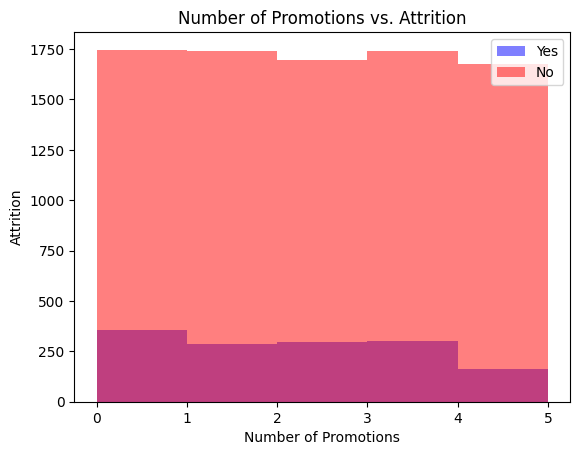

In [49]:
# Histogram for 'Number of Promotions'
plt.hist(df[df['Attrition'] == 1]['Number of Promotions'], bins=5, color='blue', alpha=0.5, label='Yes')
plt.hist(df[df['Attrition'] == 0]['Number of Promotions'], bins=5, color='red', alpha=0.5, label='No')
plt.title('Number of Promotions vs. Attrition')
plt.xlabel('Number of Promotions')
plt.ylabel('Attrition')
plt.legend()

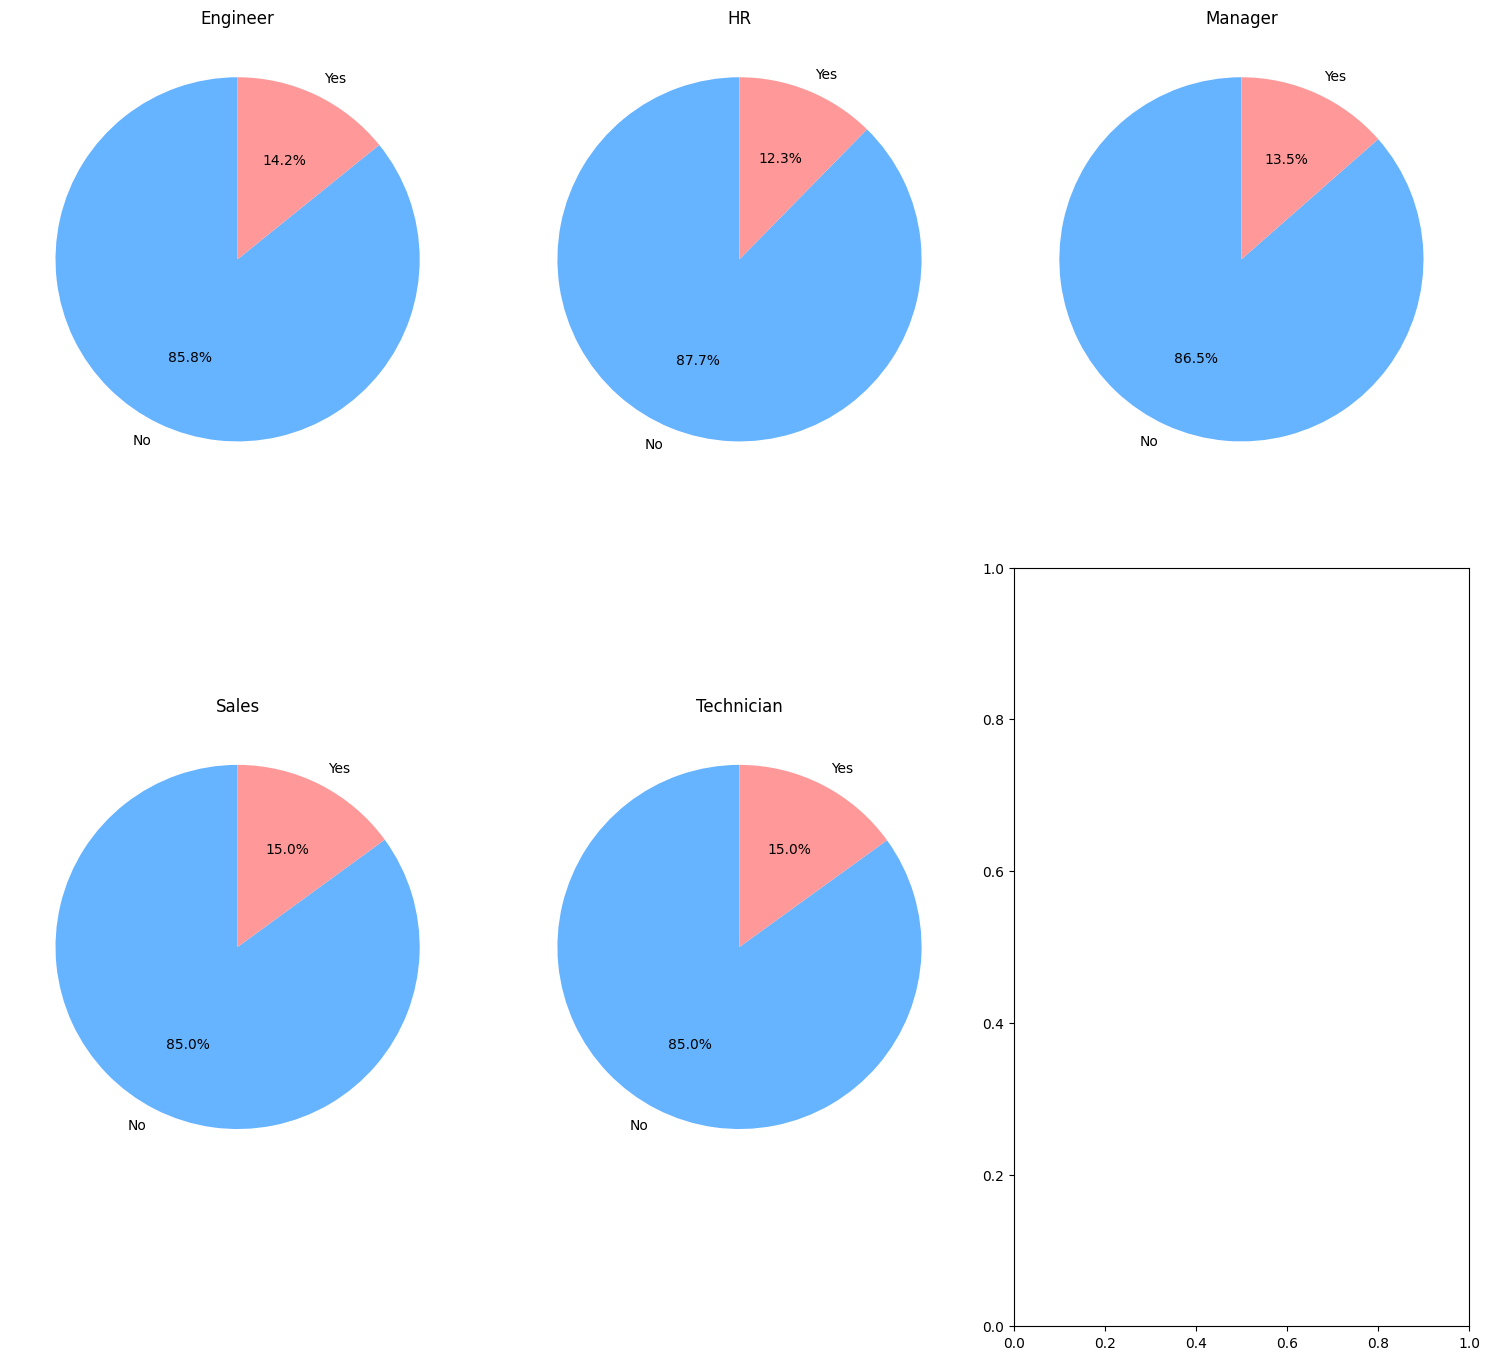

In [50]:
# Pie-chart for the categorial variable - Job role

# Group by 'Job Role' and 'Attrition', and count the occurrences
attrition_counts = df.groupby(['Job Role', 'Attrition']).size().unstack(fill_value=0)

# Plot pie charts for each job role
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, (job_role, counts) in enumerate(attrition_counts.iterrows()):
    counts.plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['#66b3ff', '#ff9999'])
    axes[i].set_title(job_role)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [51]:
# test whether the difference of yes answer rate in each 'job role' is statistically significant

import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Job Role'], df['Attrition'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
chi2, p

(8.494263378344625, 0.07506130444050535)

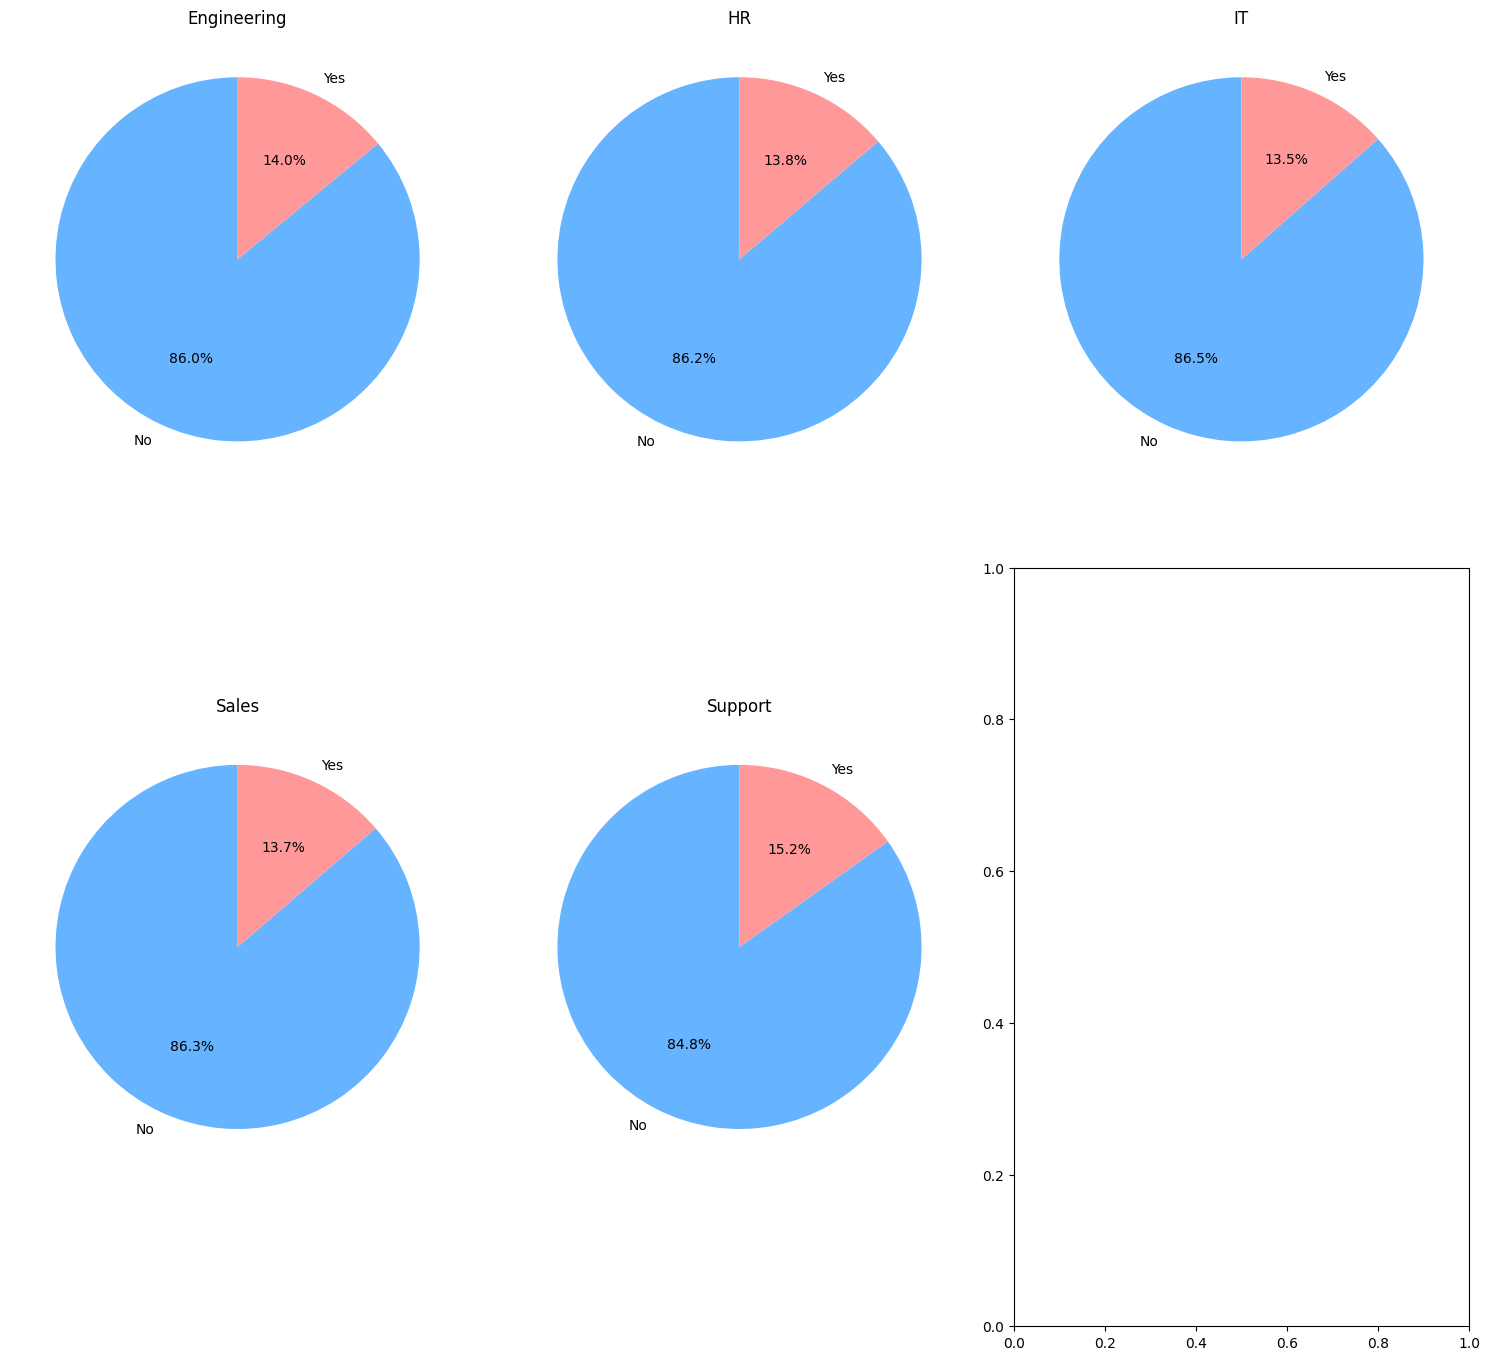

In [52]:
# Pie-chart for the categorial variable - Department

# Group by 'Department' and 'Attrition', and count the occurrences
attrition_counts = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

# Plot pie charts for each Department
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, (job_role, counts) in enumerate(attrition_counts.iterrows()):
    counts.plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['#66b3ff', '#ff9999'])
    axes[i].set_title(job_role)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [53]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Department'], df['Attrition'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(2.8262619096580757, 0.5873079975191537)

In [54]:
# test whether the difference of yes answer rate in each 'gender' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Gender'], df['Attrition'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(2.639567238054566, 0.10423193312149241)

In [57]:
# Check for data imbalance in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100

# Display the results
attrition_counts

Attrition
0    85.97
1    14.03
Name: proportion, dtype: float64

# Models

In [138]:
from sklearn.metrics import make_scorer, f1_score

# Define y and X
y = df['Attrition']
X = df[['Years at Company', 'Number of Promotions', 'Distance from Office', 
        'Job Satisfaction', 'Performance Rating', 'Job Role']]

# Define numerical and categorical columns
numerical_cols = ['Years at Company', 'Number of Promotions', 'Distance from Office', 
                  'Job Satisfaction', 'Performance Rating']
categorical_cols = ['Job Role']

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Cross-validation and evaluation with weighted average F1 score
f1_scorer_weighted = make_scorer(f1_score, average='weighted')

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f1_scorer_weighted)
    print(f"{model_name} - Cross-Validation Weighted F1 Score: {cv_scores.mean():.4f}")




Logistic Regression - Cross-Validation Weighted F1 Score: 0.7981
KNN - Cross-Validation Weighted F1 Score: 0.8062
Naive Bayes - Cross-Validation Weighted F1 Score: 0.7994
Decision Tree - Cross-Validation Weighted F1 Score: 0.7693
SVM - Cross-Validation Weighted F1 Score: 0.7971


In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define parameter grids for each model
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

param_grid_nb = {
    'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
}

# Create pipelines for each model
pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    'Naive Bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])
}

# Define GridSearchCV for each model
grid_searches = {
    'Logistic Regression': GridSearchCV(pipelines['Logistic Regression'], param_grid_logreg, cv=5, scoring='f1_weighted', n_jobs=-1),
    'KNN': GridSearchCV(pipelines['KNN'], param_grid_knn, cv=5, scoring='f1_weighted', n_jobs=-1),
    'Naive Bayes': GridSearchCV(pipelines['Naive Bayes'], param_grid_nb, cv=5, scoring='f1_weighted', n_jobs=-1)
}

# Perform GridSearchCV for each model
best_params_grid = {}
for model_name, search in grid_searches.items():
    search.fit(X_train, y_train)
    best_params_grid[model_name] = search.best_params_
    print(f"{model_name} - Best Parameters: {search.best_params_}")
    best_score = search.best_score_
    print(f"{model_name} - Best Cross-Validation Weighted F1 Score: {best_score:.4f}")




Logistic Regression - Best Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
Logistic Regression - Best Cross-Validation Weighted F1 Score: 0.7985
KNN - Best Parameters: {'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'distance'}
KNN - Best Cross-Validation Weighted F1 Score: 0.8076
Naive Bayes - Best Parameters: {'classifier__var_smoothing': 1e-09}
Naive Bayes - Best Cross-Validation Weighted F1 Score: 0.7994


In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize the models with the best parameters
best_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear', C=10),
    'KNN': KNeighborsClassifier(weights='distance', p=2, n_neighbors=7),
    'Naive Bayes': GaussianNB(var_smoothing=1e-09)
}

# Train and evaluate each model
evaluation_results = {}

for model_name, model in best_models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc
    }
    
    # Display the evaluation results for the model
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc is not None:
        print(f"ROC AUC Score: {roc:.4f}")
    else:
        print("ROC AUC Score: N/A")

# Display all evaluation results
print(evaluation_results)

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Evaluation Results:
Accuracy: 0.8560
Precision: 0.7327
Recall: 0.8560
F1 Score: 0.7896
ROC AUC Score: 0.6414
KNN Evaluation Results:
Accuracy: 0.8393
Precision: 0.7679
Recall: 0.8393
F1 Score: 0.7922
ROC AUC Score: 0.5509
Naive Bayes Evaluation Results:
Accuracy: 0.8553
Precision: 0.7327
Recall: 0.8553
F1 Score: 0.7893
ROC AUC Score: 0.6410
{'Logistic Regression': {'Accuracy': 0.856, 'Precision': 0.732736, 'Recall': 0.856, 'F1 Score': 0.7895862068965518, 'ROC AUC Score': 0.6414182387215877}, 'KNN': {'Accuracy': 0.8393333333333334, 'Precision': 0.767887446923031, 'Recall': 0.8393333333333334, 'F1 Score': 0.7921964770629923, 'ROC AUC Score': 0.5509340385946695}, 'Naive Bayes': {'Accuracy': 0.8553333333333333, 'Precision': 0.732653769179453, 'Recall': 0.8553333333333333, 'F1 Score': 0.7892547610492274, 'ROC AUC Score': 0.6410486615899389}}


<Figure size 640x480 with 0 Axes>

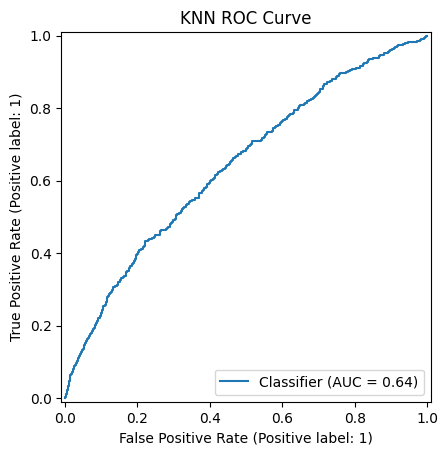

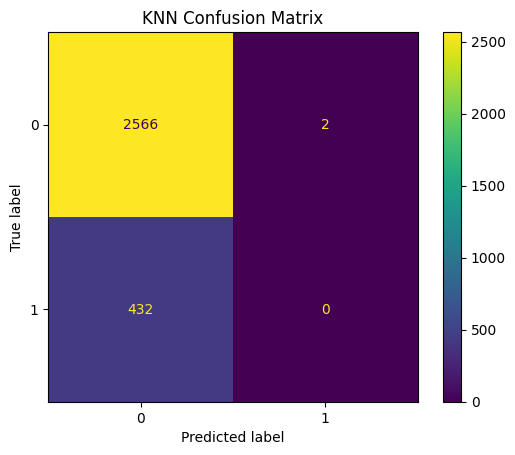

KNN Classification Report:
              precision    recall  f1-score   support

No Attrition       0.86      1.00      0.92      2568
   Attrition       0.00      0.00      0.00       432

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.73      0.86      0.79      3000



In [144]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Extract KNN model from the pipeline
knn_model = best_models['KNN']

# Calculate probabilities for ROC curve
y_prob_knn = pipeline.predict_proba(X_test)[:, 1]

# Plot ROC curve
plt.figure()
RocCurveDisplay.from_predictions(y_test, y_prob_knn)
plt.title('KNN ROC Curve')
plt.show()

# Generate confusion matrix plot
y_pred_knn = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('KNN Confusion Matrix')
plt.show()

# Generate and print classification report
class_report = classification_report(y_test, y_pred_knn, target_names=['No Attrition', 'Attrition'])
print("KNN Classification Report:")
print(class_report)


c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
900 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
526 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NeilX

Decision Tree - Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__splitter': 'best'}
Decision Tree - Best Cross-Validation Weighted F1 Score: 0.8227
Decision Tree Evaluation Scores:
Accuracy: 0.8493
Precision: 0.7928
Recall: 0.8493
F1 Score: 0.8028
ROC AUC Score: 0.5959


<Figure size 640x480 with 0 Axes>

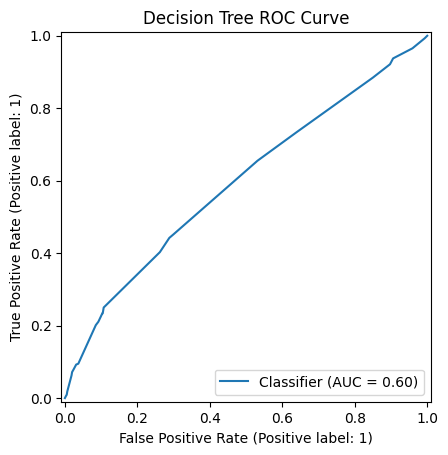

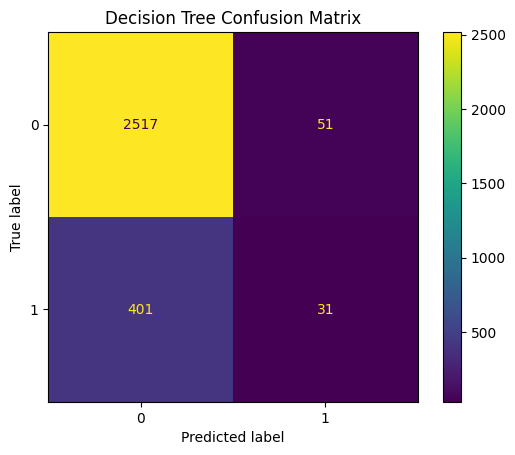

Decision Tree Classification Report:
              precision    recall  f1-score   support

No Attrition       0.86      0.98      0.92      2568
   Attrition       0.38      0.07      0.12       432

    accuracy                           0.85      3000
   macro avg       0.62      0.53      0.52      3000
weighted avg       0.79      0.85      0.80      3000



In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define parameter grid for Decision Tree
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [3,5,7,9,None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create pipeline for Decision Tree
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1_weighted', n_jobs=-1)

# Perform GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Get the best model
dt_best = grid_search_dt.best_estimator_
print(f"Decision Tree - Best Parameters: {grid_search_dt.best_params_}")
print(f"Decision Tree - Best Cross-Validation Weighted F1 Score: {grid_search_dt.best_score_:.4f}")

# Make predictions
y_pred_dt = dt_best.predict(X_test)
y_prob_dt = dt_best.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
roc_dt = roc_auc_score(y_test, y_prob_dt)

# Print evaluation scores
print("Decision Tree Evaluation Scores:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"ROC AUC Score: {roc_dt:.4f}")

# Plot ROC curve
plt.figure()
RocCurveDisplay.from_predictions(y_test, y_prob_dt)
plt.title('Decision Tree ROC Curve')
plt.show()

# Plot confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(conf_matrix_dt).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Print classification report
class_report_dt = classification_report(y_test, y_pred_dt, target_names=['No Attrition', 'Attrition'])
print("Decision Tree Classification Report:")
print(class_report_dt)
